In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import csv
import datetime
import time
import re
from mpl_toolkits.basemap import Basemap
import warnings
import matplotlib.cbook
import json

# Part A - Get Some Data

## 1. Data cleaning

In [2]:
train_data = pd.read_json('../Assignment1/train.json')

In [3]:
train_data.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


### - Check if there is any N/A in dataset

In [56]:
train_data.isnull().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
interest_level     0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
dtype: int64

In [4]:
df0=train_data.copy()

### - Check the data types of columns

In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


### - Check values of all columns

In [6]:
des=df0.describe()
des

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


###  - Based on data attributes showing above I set a few logics to identify inappropriate data

In [7]:
a=df0.loc[:, df0.dtypes == object].isnull().sum().sum()
b=df0.loc[:, df0.dtypes == int].isnull().sum().sum()
c=df0.loc[:, df0.dtypes == float].isnull().sum().sum()
if (a+b+c)==0:
    print('All data types are correct')
else:
    print('encounter inappropriate data, need further investigation')

All data types are correct


### - Check outliners of the dataset and impute inappropriate values

In [8]:
df1=df0.copy()

#### After checking description of the dataset, I found there are lot of big values.
#### First bedrooms and bathrooms

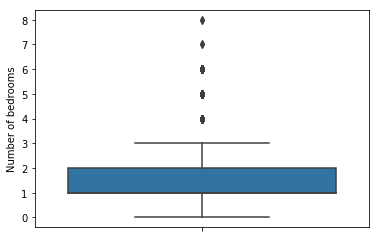

In [10]:
sns.boxplot(y=df1["bedrooms"])
plt.ylabel('Number of bedrooms');
plt.show()

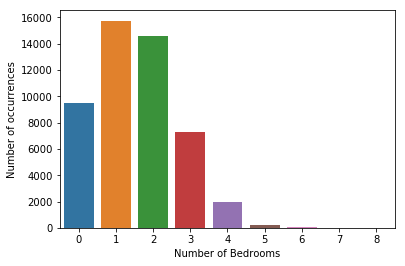

In [12]:
sns.countplot(df1.bedrooms);
plt.xlabel('Number of Bedrooms');
plt.ylabel('Number of occurrences');
plt.show()

#### Impute data which have over 4 bedrooms

In [13]:
sum(df0["bedrooms"]>4)

297

In [14]:
df1=df1[df1.bedrooms<=4]

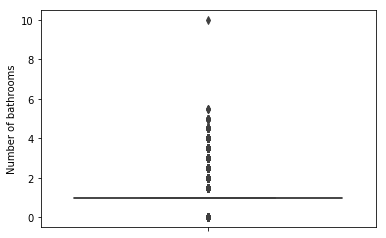

In [15]:
sns.boxplot(y=df1["bathrooms"])
plt.ylabel('Number of bathrooms');
plt.show()

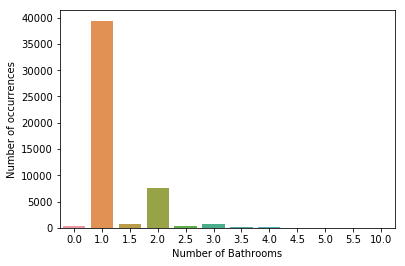

In [16]:
sns.countplot(df1.bathrooms);
plt.xlabel('Number of Bathrooms');
plt.ylabel('Number of occurrences');
plt.show()

#### Impute data which have over 3 bathrooms

In [17]:
sum(df1["bathrooms"]>2)

1173

In [18]:
df1=df1[df1["bathrooms"]<=3]

In [19]:
d=df1.describe()
d

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,48843.000000,48843.000000,48843.000000,4.884300e+04,48843.000000,4.884300e+04
mean,1.190641,1.510022,40.743001,7.023933e+06,-73.958666,3.729621e+03
std,0.442986,1.072949,0.586504,1.262793e+05,1.085300,2.213527e+04
min,0.000000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.000000,1.000000,40.728200,6.915778e+06,-73.991800,2.495000e+03
50%,1.000000,1.000000,40.751600,7.020847e+06,-73.978000,3.125000e+03
75%,1.000000,2.000000,40.774200,7.128522e+06,-73.954800,4.028000e+03
max,3.000000,4.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


#### Check price of rent and impute outliner

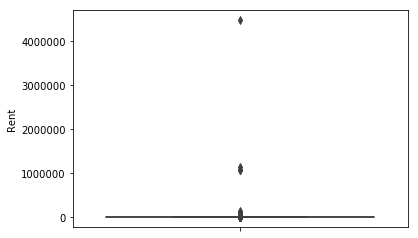

In [20]:
sns.boxplot(y=df1["price"])
plt.ylabel('Rent');
plt.show()

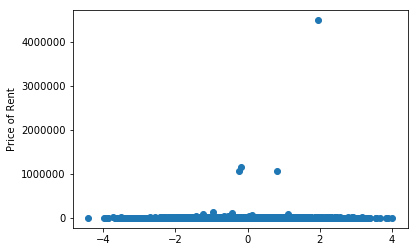

In [21]:
x=np.random.randn(len(df1))
y=list(df1['price'])
plt.scatter(x, y)
plt.ylabel('Price of Rent');
plt.show()

#### Impute data which have rent price over 10k

In [22]:
sum(df1["price"]>10000)

627

In [23]:
df1=df1[df1["bathrooms"]<=10000]

#### Impute location data between quatile of 5%~99.5%
#### Keep most data impute extreme outlier

In [24]:
df1=df1[(df1.longitude>df1.longitude.quantile(0.005))&(df1.longitude<df1.longitude.quantile(0.995))]

In [25]:
df1=df1[(df1.latitude>df1.latitude.quantile(0.005))&(df1.latitude<df1.latitude.quantile(0.995))]

#### Categorize interest level with numbers from 0 to 2

In [26]:
df1['interest'] = np.where(df1.interest_level=='low', 0, np.where(df1.interest_level=='medium', 1, 2))

#### Impute similar location information, only keep coordinates of locations

In [27]:
df1.drop(['display_address','street_address','building_id'], inplace=True, axis=1)

In [28]:
df1.head()

,bathrooms,bedrooms,created,description,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,interest
10,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,1
10000,1.0,2,2016-06-12 12:19:27,,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,0
100004,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...","[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,2
100007,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,0
100013,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,0


## 2. Answer the following questions for the data in each column:
## 3. Plot each colmun as appropriate for the data type

### - Distribution of data

#### Target--Interest level

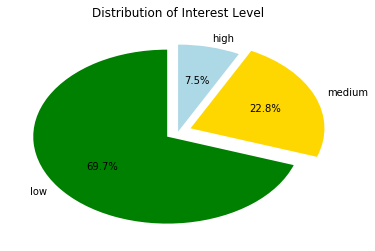

In [29]:
sizes = df1.interest_level.value_counts().values
patches, texts,autotexts= plt.pie(sizes, labels=["low","medium","high"], colors=['green','gold','lightblue'], explode=[0.1,0.1,0], autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Interest Level")
plt.show()

#### Interest level and bedrooms and bathroooms

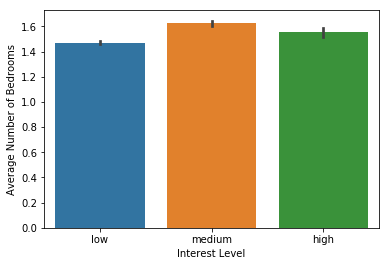

In [30]:
sns.barplot(x='interest_level', y='bedrooms', data=df1, order=['low', 'medium', 'high']);
plt.xlabel('Interest Level');
plt.ylabel('Average Number of Bedrooms');
plt.show()

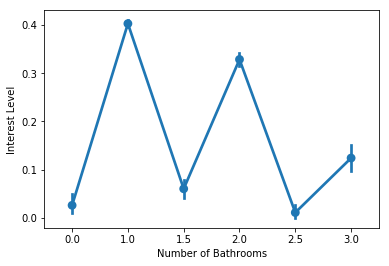

In [31]:
sns.pointplot(x="bathrooms", y="interest", data=df1);
plt.xlabel('Number of Bathrooms');
plt.ylabel('Interest Level');
plt.show()

#### Distribution of apartments/houses

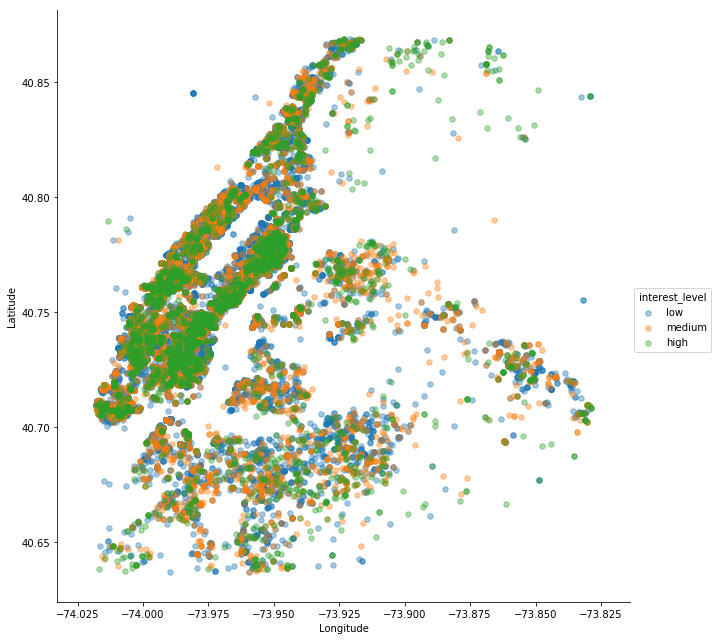

In [32]:
sns.lmplot(x="longitude", y="latitude", fit_reg=False, hue='interest_level',
           hue_order=['low', 'medium', 'high'], size=9, scatter_kws={'alpha':0.4,'s':30},
           data=df1);
plt.xlabel('Longitude');
plt.ylabel('Latitude');
plt.show()

#### Rent prices distribution

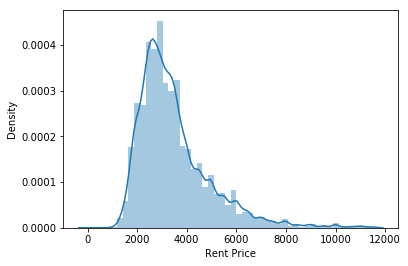

In [33]:
sns.distplot(df1.price[df1.price<=df1.price.quantile(0.99)]);
plt.xlabel('Rent Price');
plt.ylabel('Density');
plt.show()

#### Photos, features and description are lists of words. 
#### So I created a few columns to count the length of these features.

In [34]:
df2=df1.copy()

In [35]:
df2['image_len']=df2['photos'].apply(len)
df2['features_len'] = df2['features'].apply(len)
df2['description_len'] = df2['description'].apply(len)
df2['description_word_len'] = df2['description'].apply(lambda x: len(x.split(' ')))

#### Count of images and interest level

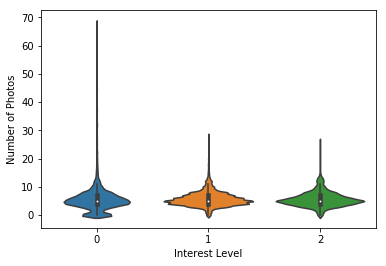

In [37]:
sns.violinplot(list(df2['interest']), list(df2['image_len']))
plt.xlabel('Interest Level')
plt.ylabel('Number of Photos')
plt.show()

#### Length of features and interest level

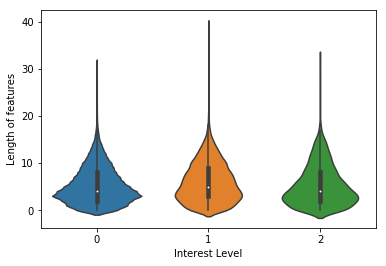

In [122]:
sns.violinplot(list(df2['interest']), list(df2['features_len']))
plt.xlabel('Interest Level')
plt.ylabel('Length of features')
plt.show()

#### Length of description and interest level

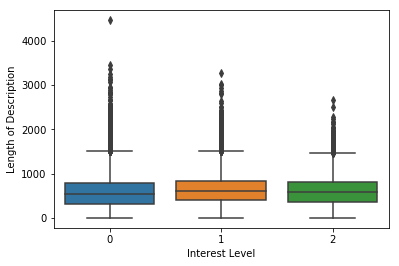

In [39]:
sns.boxplot(list(df2['interest']), list(df2['description_len']))
plt.xlabel('Interest Level')
plt.ylabel('Length of Description')
plt.show()

#### I calculated the interest level by manager ID and created a column to store interest level by manager

In [40]:
df3=df2.copy()

In [41]:
man_counts = pd.DataFrame(df2.manager_id.value_counts())
man_counts['m_counts'] = man_counts['manager_id']
man_counts['manager_id'] = man_counts.index

In [42]:
df3 = pd.merge(df3, man_counts, on="manager_id")

In [43]:
grouped_m = df1.groupby(['manager_id', 'interest_level'])['manager_id'].count().unstack('interest_level').fillna(0)
grouped_m['sum']=grouped_m.high+grouped_m.low+grouped_m.medium
sorted_m=grouped_m.sort_values(['sum'], ascending=False)

In [44]:
s=sorted_m[:20]

#### Top 20 manager, plot by interest level

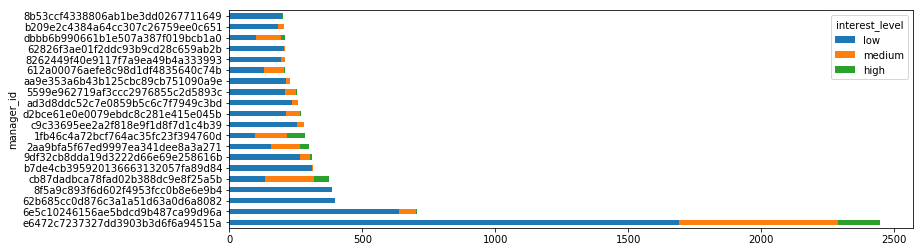

In [45]:
%matplotlib inline
s[['low', 'medium', 'high']].plot.barh(stacked=True, figsize=(12.25, 4))
plt.show()

#### Interest level and month and hour

In [46]:
df4=df3.copy()

In [47]:
df4.created = pd.to_datetime(df4.created, format='%Y-%m-%d %H:%M:%S')
df4['month'] = df4.created.dt.month
df4['hour'] = df4.created.dt.hour

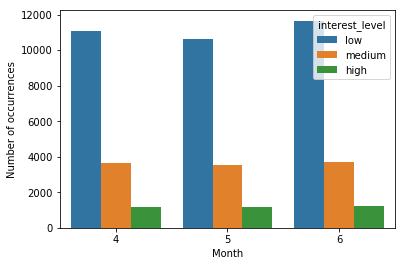

In [50]:
sns.countplot(x="month", hue="interest_level", hue_order=['low', 'medium', 'high'], data=df4);
plt.xlabel('Month');
plt.ylabel('Number of occurrences');
plt.show()

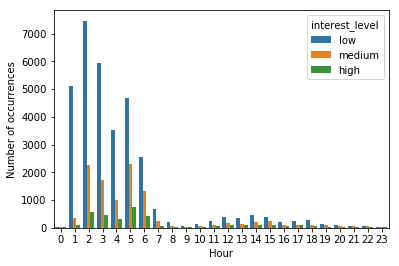

In [51]:
sns.countplot(x="hour", hue="interest_level", hue_order=['low', 'medium', 'high'], data=df4);
plt.xlabel('Hour');
plt.ylabel('Number of occurrences');
plt.show()

### Plot Summary
1. Interest level over bathrooms is not very obvious. 1.5 bathrooms is most common.
2. Apartments with 1-2 bedrooms get most interest level.
3. Location may not indicate a clear relation between interest level. But we can tell from the plot that most interest clusters in Manhattan. 
4. The distribution of 3 levels are low-69.7% medium-22.8% high-7.5%. 
5. Rent price between 2000 and 4000 got more higher interest level.
6. The more photos the higher interest level. Photo count around 5 gets more attention.
7. The more feature description the higher interest level. Features count around 3 gets more attention.
8. Length of description under 1000 gets the most interest. 
9. The most popular rental manager could get 2447 in total of interest level. Rental manager is important and related to our target.
10. April, May and June are the most popular time of this website.
11. The main rental hunting clusters around one to seven in a day.
12. Most important features in this research are bathrooms, bedrooms, price, location, number of images, number of features, length of description and rental managers.


## Are any of the columns correlated?

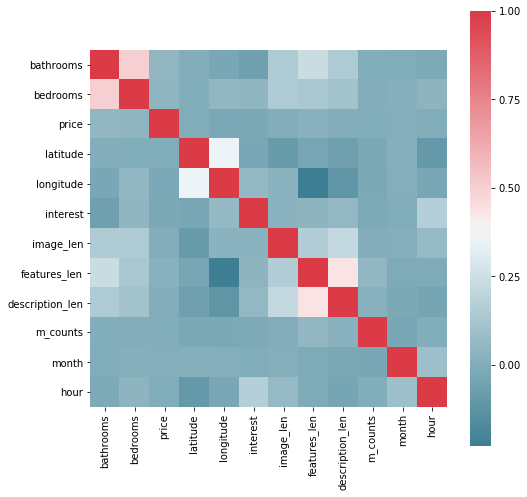

In [52]:
f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)
correlations = df4[['bathrooms', 'bedrooms', 'price','latitude', 'longitude', 'interest', 'image_len', 'features_len', 'description_len', 'm_counts', 'month', 'hour']].corr()
sns.heatmap(correlations, mask=np.zeros_like(correlations, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [53]:
correlations>0.8

,bathrooms,bedrooms,price,latitude,longitude,interest,image_len,features_len,description_len,m_counts,month,hour
bathrooms,True,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False
price,False,False,True,False,False,False,False,False,False,False,False,False
latitude,False,False,False,True,False,False,False,False,False,False,False,False
longitude,False,False,False,False,True,False,False,False,False,False,False,False
interest,False,False,False,False,False,True,False,False,False,False,False,False
image_len,False,False,False,False,False,False,True,False,False,False,False,False
features_len,False,False,False,False,False,False,False,True,False,False,False,False
description_len,False,False,False,False,False,False,False,False,True,False,False,False
m_counts,False,False,False,False,False,False,False,False,False,True,False,False


In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [120]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [121]:
vif.round(1)

,VIF Factor,features
0,11.5,bathrooms
1,4.0,bedrooms
2,1.0,price
3,884643.9,latitude
4,885026.9,longitude
5,3.7,image_len
6,3.8,features_len
7,4.3,description_len
8,1.2,m_counts


#### Based on the correlation and vif value, there is no feature strongly correlated.

## Write a clear summary of what the EDA tells you

1. Interest level is my target. 
2. There is no missing values.
3. All the data matches its columns data types.
4. The most expensive rental listing in dataset is 4.5 million per month. It has 4 bedrooms and 3 bathrooms.
5. The distribution of 3 levels are low-69.7% medium-22.8% high-7.5%. 
6. Most of the rental informatiomn is not attractive to users.
7. Rent price between 2000 and 4000 got more higher interest level.
8. The more photos the higher interest level. Photo count around 5 gets more attention.
9. The more feature description the higher interest level. Features count around 3 gets more attention.
10. Length of description under 1000 gets the most interest. 
11. The most popular rental manager could get 2447 in total of interest level. Rental manager is important and related to our target.
12. April, May and June are the most popular time of this website.
13. The main rental hunting clusters around one to seven in a day.
14. Most important features in this research are bathrooms, bedrooms, price, location, number of images, number of features, length of description and rental managers.
15. Interest level over bathrooms is not very obvious. 1.5 bathrooms is most common.
16. Apartments with 1-2 bedrooms get most interest level.
17. Location may not indicate a clear relation between interest level. But we can tell from the plot that most interest clusters in Manhattan. 
18. There is no obvious correlation between these important features.

# Part B - Analyze Some Data

## a. A clear description of the question being asked.
This research is based on the data RentHop provided. RentHop is a rental listing website. The prediction on interest level of each listing will help better business of rental listing website. The interest level prediction is mainly based on factors such as number of rooms, location, price and so on. The prediction target would be interest level high, medium and low. 
The problem of classification is considered as learning a model that maps instances to class labels. There are lots of commonly used models in prediction. In this report I will use Sensor Vector Regression, Gradient Random Boosting and Random Forest for my research. I will cross-validate the classifiers and evaluate them.

## b. Background research of related work.
The problem of classification is considered as learning a model that maps instances to class labels. There are lots of commonly used models in prediction. In this report I will use Sensor Vector Regression, Gradient Random Boosting and Random Forest for my research. I will cross-validate the classifiers and evaluate them. 
Random Forests grows many classification trees. To classify a new object from an input vector, put the input vector down each of the trees in the forest. Each tree gives a classification, and we say the tree "votes" for that class. The forest chooses the classification having the most votes (over all the trees in the forest)[6].
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default)[5].
Gradient boosting allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced[7][8][9].
Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. The model produced by support vector classification (as described above) depends only on a subset of the training data, because the cost function for building the model does not care about training points that lie beyond the margin. Analogously, the model produced by Support Vector Regression depends only on a subset of the training data, because the cost function for building the model ignores any training data close to the model prediction[10].


## c. Data sources?
The data comes from https://www.renthop.com/, an apartment listing website. These apartments are located in New York City. The target variable, interest_level, is defined by the number of inquiries a listing has in the duration that the listing was live on the site. 
The JSON dataset is a structured database that contains the listing information as the number of bathrooms and bedrooms, building_id, created, description, display_address, features, latitude, listing_id, longitude, manager_id, photos links, price, street_address, and interest_level[1].

## d. What algorithms are being used and code sources.
Radom Forest, Support Vector Machine and Gradient Boosting are used in this resarch.
Code sources: Data Exploration Two Sigma Renthop, Sergei Neviadomski, Sep.2017
Rent Interest Classifier, Elisabeth Kim, April. 2017.
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
http://scikit-learn.org/stable/modules/svm.html
http://scikit-learn.org/stable/modules/cross_validation.html#k-fold
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

## e. References. 
[1] Rent Interest Classifier, Elisabeth Kim, April. 2017.
[2] Data Exploration Two Sigma Renthop, Sergei Neviadomski, Sep.2017
[3] Predictive Modeling of NBA Player Value Using AdaBoost and Stochastic Gradient Descent for Applications to Fantasy Basketball Betting, Thomas Kalnik, 2017.
[4] Google Stock Prediction and Time Series Analysis, Aswathnarayan Muthukrishnan Kirubakaran, Meenakshi Muthiah, 2017
[5]http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
[6] L. Breiman, “Random Forests”, Machine Learning, 45(1), 5-32, 2001.
[7] J. Friedman, Stochastic Gradient Boosting, 1999
[8] J. Friedman, Greedy Function Approximation: A Gradient Boosting Machine, The Annals of Statistics, Vol. 29, No. 5, 2001.
[9] T. Hastie, R. Tibshirani and J. Friedman. Elements of Statistical Learning Ed. 2, Springer, 2009.
[10] http://scikit-learn.org/stable/modules/svm.html


## f. Analysis 

In [55]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from sklearn.metrics import accuracy_score
import time

### Choose key features for research. And split the dataset to train and test.

In [56]:
# Split data into train and test sets
X = df4[['bathrooms', 'bedrooms', 'price', 'latitude','longitude', 'image_len','features_len', 'description_len', 'm_counts']]
Y = df4['interest']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=42)

In [59]:
def print_scores(test_name, train, test):
    print ('{0} train score: {1}\n{0} test score: {2}\n'.format(test_name, train, test))

### Using random forest model to train classifier and get accuracy of prediction on test and train dataset

In [72]:
random_forest = RandomForestClassifier(n_estimators=10)
start_time=time.time()
random_forest = random_forest.fit(X_train, y_train)
print ('It took %s seconds to finish training random forest classifier' % (time.time() - start_time))
test_name_rf='Random Forest'
train_rf=random_forest.score(X_train, y_train)
test_rf=accuracy_score(y_test, random_forest.predict(X_test))
print_scores(test_name=test_name_rf, train=train_rf, test=test_rf)

It took 0.797044038773 seconds to finish training random forest classifier
Random Forest train score: 0.964067027092
Random Forest test score: 0.711965990661



### Using gradient boosting model to train classifier and get accuracy of prediction on test and train dataset

In [73]:
gradientB_model = GradientBoostingClassifier(n_estimators=20,
                                      learning_rate=1.0,
                                      max_depth=1,
                                      random_state=0)
start_time=time.time()
gradientB_model = gradientB_model.fit(X_train, y_train)
print ('It took %s seconds to finish training gradient boosting classifier' % (time.time() - start_time))
test_name_g='Gradient Boosting Classifier'
train_g=gradientB_model.score(X_train, y_train)
test_g=accuracy_score(y_test, gradientB_model.predict(X_test))
print_scores(test_name=test_name_g, train=train_g, test=test_g)

It took 0.899808168411 seconds to finish training gradient boosting classifier
Gradient Boosting Classifier train score: 0.704770154425
Gradient Boosting Classifier test score: 0.706111924176



### Using support vector machine to train classifier and get accuracy of prediction on test and train dataset

In [74]:
svm_model = svm.SVC(decision_function_shape='ovo', tol=0.00000001)
start_time=time.time()
svm_model = svm_model.fit(X_train, y_train)
print ('It took %s seconds to finish training support vector machine' % (time.time() - start_time))
test_name_svm='Support Vector Machine'
train_svm=svm_model.score(X_train, y_train)
test_svm=accuracy_score(y_test, svm_model.predict(X_test))
print_scores(test_name=test_name_svm, train=train_svm, test=test_svm)

It took 350.148959875 seconds to finish training support vector machine
Support Vector Machine train score: 0.974133038621
Support Vector Machine test score: 0.706181615444



In [79]:
cols=['SVM','GradientB','Random Forest']
indexs=['train','test','time']
l_svm=['97.41%','70.62%','350.1s']
l_g=['70.48%','70.61%','0.89s']
l_rf=['96.41%','71.20%','0.79s']
ds=pd.DataFrame(index=indexs, columns=cols)
ds.SVM=l_svm
ds.GradientB=l_g
ds['Random Forest']=l_rf

In [82]:
ds

,SVM,GradientB,Random Forest
train,97.41%,70.48%,96.41%
test,70.62%,70.61%,71.20%
time,350.1s,0.89s,0.79s


### Evaluation of the classifier used.

In [109]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#### Get MSE, RMSE, MAE and R square of the models

In [114]:
mse_g = mean_squared_error(Y, gradientB_model.predict(X))
rmse_g = np.sqrt(metrics.mean_squared_error(Y, gradientB_model.predict(X)))
r2_g=r2_score(Y, gradientB_model.predict(X))
mae_g=mean_absolute_error(Y, gradientB_model.predict(X))

In [115]:
mse_rf = mean_squared_error(Y, random_forest.predict(X))
rmse_rf = np.sqrt(metrics.mean_squared_error(Y, random_forest.predict(X)))
r2_rf=r2_score(Y, random_forest.predict(X))
mae_rf=mean_absolute_error(Y, random_forest.predict(X))

In [116]:
mse_svm = mean_squared_error(Y, svm_model.predict(X))
rmse_svm = np.sqrt(metrics.mean_squared_error(Y, svm_model.predict(X)))
r2_svm=r2_score(Y, svm_model.predict(X))
mae_svm=mean_absolute_error(Y, svm_model.predict(X))

In [127]:
type(l_mse)

list

In [133]:
indexs2=['SVM','GradientB','Random Forest']
cols2=['MSE','RMSE','MAE', 'R2']
ds2=pd.DataFrame(index=indexs2, columns=cols2)
l_mse=[mse_svm,mse_g,mse_rf]
l_rmse=[rmse_svm,rmse_g,rmse_rf]
l_mae=[mae_svm,mae_g,mae_rf]
l_r2=[r2_svm,r2_g,r2_rf]
ds2.MSE=l_mse
ds2.RMSE=l_rmse
ds2.MAE=l_mae
ds2.R2=l_r2

In [134]:
ds2

,MSE,RMSE,MAE,R2
SVM,0.172744,0.415625,0.128418,0.551262
GradientB,0.476729,0.690456,0.355461,-0.238403
Random Forest,0.157418,0.396760,0.126850,0.591073


#### Cross validate the classifier used
#### I used k fold cross-validation here. I set k to 5 and 10 to see if there is any overfitting and underfitting. 

In [85]:
from sklearn.cross_validation import cross_val_score

In [98]:
# use k-fold cross-validation
scores5 = cross_val_score(svm_model, X, Y, cv=5)

In [89]:
print('Cross-validated scores:', scores5)
print(scores5.mean())

('Cross-validated scores:', array([ 0.69694752,  0.6934978 ,  0.68973448,  0.69607946,  0.69691584]))
0.694635019764


In [99]:
scores10 = cross_val_score(svm_model, X, Y, cv=10)

In [100]:
print('Cross-validated scores:', scores10)
print(scores10.mean())
# set the k to 10 will help to improve accuracy of the model
# validation in my case doesn't help very much

('Cross-validated scores:', array([ 0.69669732,  0.68770903,  0.69230769,  0.68450763,  0.69015262,
        0.68402342,  0.69322459,  0.69406106,  0.69657047,  0.69719783]))
0.691645167538


In [94]:
scores5_g = cross_val_score(gradientB_model, X, Y, cv=5)

In [95]:
print('Cross-validated scores:', scores5_g)
print(scores5_g.mean())

('Cross-validated scores:', array([ 0.70353335,  0.70938741,  0.69422956,  0.69963408,  0.70778881]))
0.702914644008


In [96]:
scores10_g = cross_val_score(gradientB_model, X, Y, cv=10)

In [97]:
print('Cross-validated scores:', scores10_g)
print(scores10_g.mean())

('Cross-validated scores:', array([ 0.70422241,  0.7048495 ,  0.7090301 ,  0.70562409,  0.69642484,
        0.69280636,  0.70012547,  0.70054371,  0.70618988,  0.70890841]))
0.702872474844


In [90]:
scores5_rf = cross_val_score(random_forest, X, Y, cv=5)

In [91]:
print('Cross-validated scores:', scores5_rf)
print(scores5_rf.mean())

('Cross-validated scores:', array([ 0.70217437,  0.67886264,  0.67300857,  0.69837951,  0.7036069 ]))
0.691206397374


In [92]:
scores10_rf = cross_val_score(random_forest, X, Y, cv=10)

In [93]:
print('Cross-validated scores:', scores10_rf)
print(scores10_rf.mean())

('Cross-validated scores:', array([ 0.70129599,  0.68102007,  0.66011706,  0.66171859,  0.66234581,
        0.6670849 ,  0.67963195,  0.69196989,  0.69698871,  0.70451694]))
0.680668989322


In [107]:
cols1=['SVM','GradientB','Random Forest']
indexs1=['k=5','k=10']
l_svm1=[np.round_(scores5, decimals=2),np.round_(scores10, decimals=2)]
l_g1=[np.round_(scores5_g, decimals=2),np.round_(scores10_g, decimals=2)]
l_rf1=[np.round_(scores5_rf, decimals=2),np.round_(scores10_rf, decimals=2)]
ds1=pd.DataFrame(index=indexs1, columns=cols1)
ds1.SVM=l_svm1
ds1.GradientB=l_g1
ds1['Random Forest']=l_rf1

In [108]:
ds1

,SVM,GradientB,Random Forest
k=5,"[0.7, 0.69, 0.69, 0.7, 0.7]","[0.7, 0.71, 0.69, 0.7, 0.71]","[0.7, 0.68, 0.67, 0.7, 0.7]"
k=10,"[0.7, 0.69, 0.69, 0.68, 0.69, 0.68, 0.69, 0.69...","[0.7, 0.7, 0.71, 0.71, 0.7, 0.69, 0.7, 0.7, 0....","[0.7, 0.68, 0.66, 0.66, 0.66, 0.67, 0.68, 0.69..."


In [ ]:
# In case kernel restarts. This will help to recover dataset quickly.
train_data = pd.read_json('../Assignment1/train.json')
df0=train_data.copy()
df1=df0.copy()
df1=df1[df1.bedrooms<=4]
df1=df1[df1["bathrooms"]<=3]
df1=df1[df1["bathrooms"]<=10000]
df1=df1[(df1.longitude>df1.longitude.quantile(0.005))&(df1.longitude<df1.longitude.quantile(0.995))]
df1=df1[(df1.latitude>df1.latitude.quantile(0.005))&(df1.latitude<df1.latitude.quantile(0.995))]
df1['interest'] = np.where(df1.interest_level=='low', 0, np.where(df1.interest_level=='medium', 1, 2))
df1.drop(['display_address','street_address','building_id'], inplace=True, axis=1)
df2=df1.copy()
df2['image_len']=df2['photos'].apply(len)
df2['features_len'] = df2['features'].apply(len)
df2['description_len'] = df2['description'].apply(len)
df2['description_word_len'] = df2['description'].apply(lambda x: len(x.split(' ')))
df3=df2.copy()
man_counts = pd.DataFrame(df2.manager_id.value_counts())
man_counts['m_counts'] = man_counts['manager_id']
man_counts['manager_id'] = man_counts.index
man_counts['m_count_log'] = np.log10(man_counts['m_counts'])
df3 = pd.merge(df3, man_counts, on="manager_id")
grouped_m = df1.groupby(['manager_id', 'interest_level'])['manager_id'].count().unstack('interest_level').fillna(0)
grouped_m['sum']=grouped_m.high+grouped_m.low+grouped_m.medium
sorted_m=grouped_m.sort_values(['sum'], ascending=False)
df4=df3.copy()
df4.created = pd.to_datetime(df4.created, format='%Y-%m-%d %H:%M:%S')
df4['month'] = df4.created.dt.month
df4['hour'] = df4.created.dt.hour